In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('emotiondataset.tsv',delimiter=',',quoting=3,header=None,names=["review","emotion"])

In [2]:
dataset.fillna(method='ffill',inplace=True)

In [3]:
dataset.shape

(45309, 2)

#### Splitting the data


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.iloc[:,0].values,dataset.iloc[:,1].values,test_size=0.25,random_state=101)

In [5]:
print("x_train size is ",len(x_train))
print("x_test size is ",len(x_test))
print("y_train size is ",len(y_train))
print("y_test size is ",len(y_test))

x_train size is  33981
x_test size is  11328
y_train size is  33981
y_test size is  11328


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33981,)
(33981,)
(11328,)
(11328,)


##### converting into expand dimension for encoding y_train and y_test

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33981,)
(33981,)
(11328,)
(11328,)


#### feature_extraction using CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,1))
training_data=cv.fit_transform(x_train)
testing_data=cv.transform(x_test)

In [9]:
training_data.shape

(33981, 6000)

### Classifiaction

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [11]:
classifier.fit(training_data,y_train)
pred_y=classifier.predict(testing_data)

### Prediction 

In [12]:
pred_y=classifier.predict(testing_data)

In [13]:
print(pred_y)

[0 1 3 ... 1 2 0]


### Confusion Matrix 

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,pred_y)

In [15]:
print(cm)

[[ 938  747  661   46    6]
 [ 893 2355  765   51    9]
 [ 895  869 2019  137   21]
 [ 116   85  172  240    6]
 [  25   18   32    4  218]]


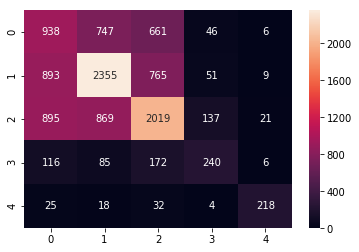

In [16]:
import seaborn as sb
sb.heatmap(cm,annot=True,fmt="d")

### Accuracy_score 

In [17]:
acc=accuracy_score(y_test,pred_y)
print(acc)

0.5093573446327684


### Classification Report 

In [18]:
cr = classification_report(y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.39      0.36      2398
           1       0.58      0.58      0.58      4073
           2       0.55      0.51      0.53      3941
           3       0.50      0.39      0.44       619
           4       0.84      0.73      0.78       297

   micro avg       0.51      0.51      0.51     11328
   macro avg       0.56      0.52      0.54     11328
weighted avg       0.52      0.51      0.51     11328



### Improving the model

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2', None]}
grid = GridSearchCV(classifier, param_grid, cv=10)
grid.fit(training_data, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.51
Best parameters:  {'max_features': None}


In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(training_data,y_train)
pred_y=classifier.predict(testing_data)
acc=accuracy_score(y_test,pred_y)
print(acc)

0.5093573446327684
